<a href="https://colab.research.google.com/github/cristobalperezp/Intro_Deep_Learning/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 1 - Introducción al Deep Learning
<h2 align="center">  Integrantes: 
<h3 align="center"> IN6534-1 - Introducción al Deep Learning
<h3 align="center"> Primavera 2022

---

# Lectura de Datos

In [544]:
! pip install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [545]:
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("Set2")
    )

In [546]:
!git clone 'https://github.com/cristobalperezp/Intro_Deep_Learning.git'

fatal: destination path 'Intro_Deep_Learning' already exists and is not an empty directory.


In [547]:
path_base = '/content/Intro_Deep_Learning'

In [548]:
df = pd.read_excel('/content/Intro_Deep_Learning/T1_credito.xlsx')

# Análisis Exploratorio de Datos

## Exploración Inicial

In [549]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S


In [550]:
df.shape

(3000, 11)

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3000 non-null   int64  
 1   AgnosDirec    2999 non-null   float64
 2   AgnosEmpleo   2998 non-null   float64
 3   DeudaExt      2999 non-null   float64
 4   DeudaInt      2996 non-null   float64
 5   Edad          2998 non-null   float64
 6   Ingreso       2998 non-null   float64
 7   Ingreso2      3000 non-null   float64
 8   Nacionalidad  3000 non-null   object 
 9   NivelEdu      3000 non-null   object 
 10  VarObj        3000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 257.9+ KB


In [552]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,101500.500,866.170,100001.000,100750.750,101500.500,102250.250,103000.000
AgnosDirec,2999.0,7.088,6.962,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,2998.0,7.147,6.653,0.000,2.000,5.000,10.000,47.000
DeudaExt,2999.0,4531.013,7084.775,21.551,1110.243,2278.662,5093.769,123939.236
DeudaInt,2996.0,2275.677,5409.792,8.304,416.039,958.279,2318.271,190648.853
Edad,2998.0,37.660,36.634,18.000,29.000,36.500,44.000,1970.000
Ingreso,2998.0,62567.743,49385.681,-13123.602,30282.678,49516.129,78851.470,536488.400
Ingreso2,3000.0,52152.667,42246.043,-9723.719,25109.557,40632.271,66206.198,513618.589


In [553]:
# Outliers en: Edad, Ingreso1, Ingreso2

In [554]:
mask = df['Edad']>90
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
137,100138,7.0,13.0,11982.421363,8423.543356,1970.0,134230.440064,114093.282397,N,Med,N


In [555]:
mask = df['Edad']<90
df = df[mask]

In [556]:
mask = df['Ingreso']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522,3.0,0.0,797.023075,670.738436,29.0,-13123.60228,-9723.719313,N,Bas,S


In [557]:
mask = df['Ingreso']>0
df = df[mask]

In [558]:
mask = df['Ingreso2']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [559]:
mask = df['Ingreso2']>0
df = df[mask]

In [560]:
df.dtypes

ID                int64
AgnosDirec      float64
AgnosEmpleo     float64
DeudaExt        float64
DeudaInt        float64
Edad            float64
Ingreso         float64
Ingreso2        float64
Nacionalidad     object
NivelEdu         object
VarObj           object
dtype: object

In [561]:
df.duplicated().sum()

0

In [562]:
df.nunique()

ID              2994
AgnosDirec        45
AgnosEmpleo       41
DeudaExt        2993
DeudaInt        2990
Edad              53
Ingreso         2994
Ingreso2        2994
Nacionalidad       1
NivelEdu           5
VarObj             2
dtype: int64

In [563]:
df.isnull().sum()

ID              0
AgnosDirec      1
AgnosEmpleo     2
DeudaExt        1
DeudaInt        4
Edad            0
Ingreso         0
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

In [564]:
df.isnull().sum()/df.shape[0]

ID              0.000000
AgnosDirec      0.000334
AgnosEmpleo     0.000668
DeudaExt        0.000334
DeudaInt        0.001336
Edad            0.000000
Ingreso         0.000000
Ingreso2        0.000000
Nacionalidad    0.000000
NivelEdu        0.000000
VarObj          0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

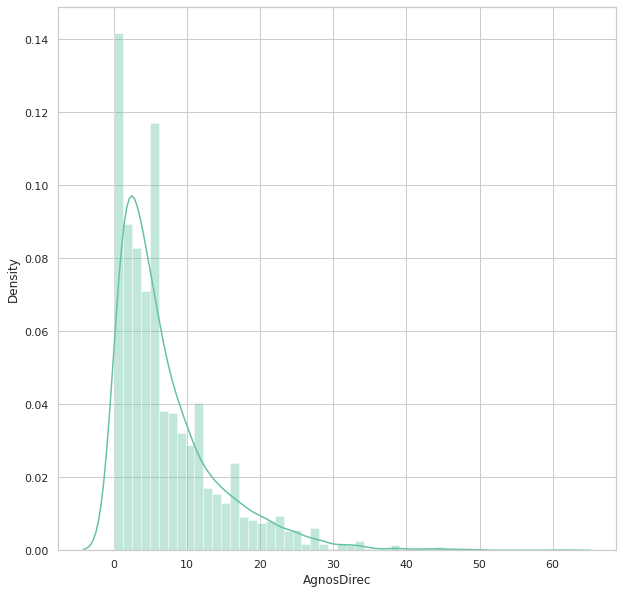

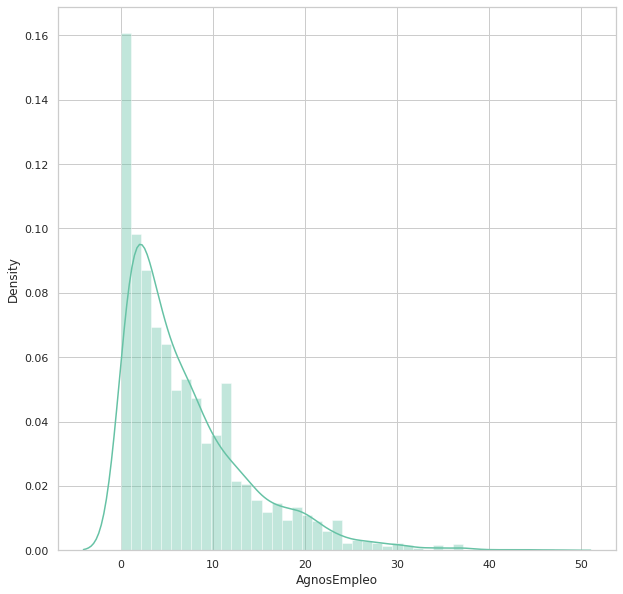

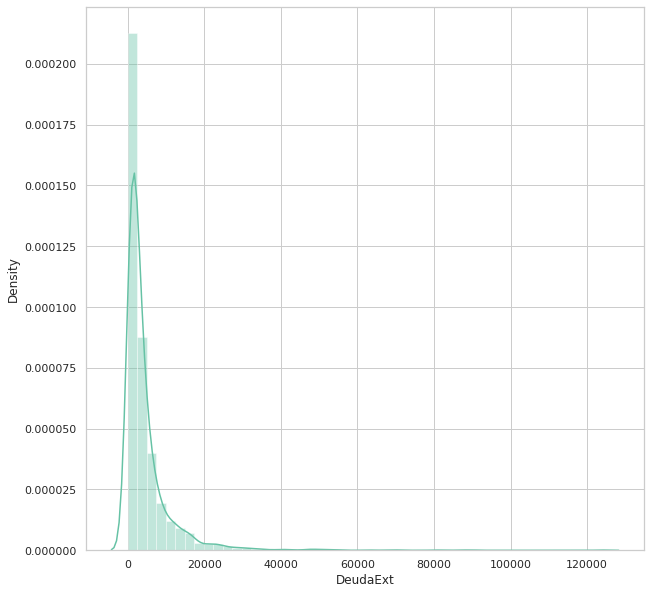

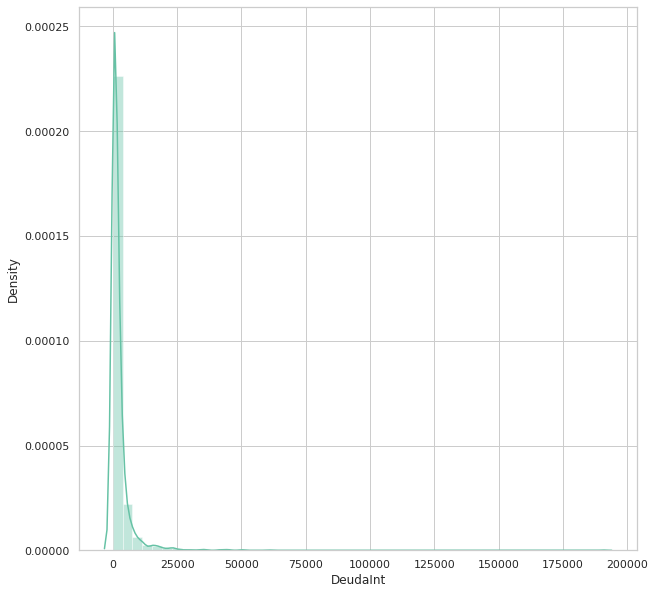

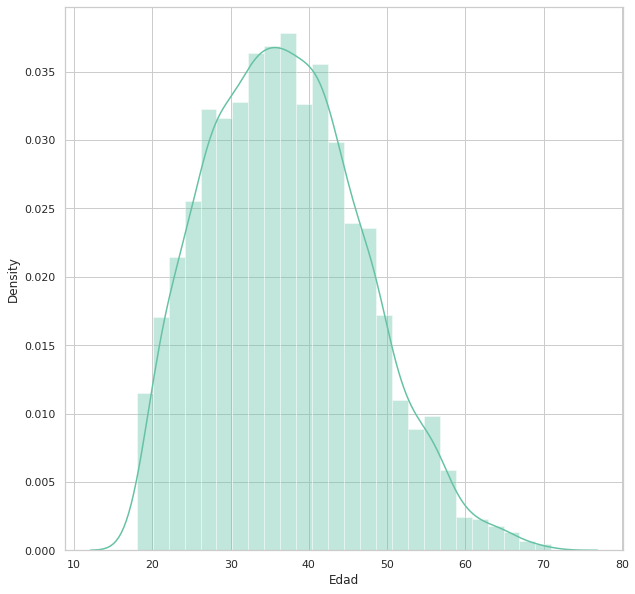

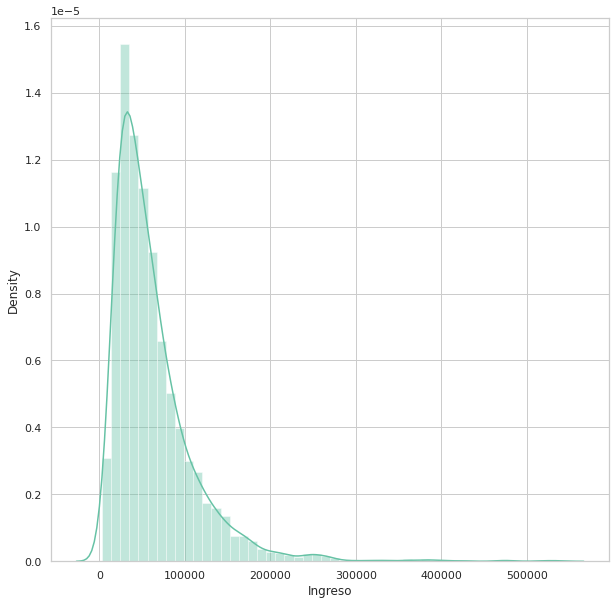

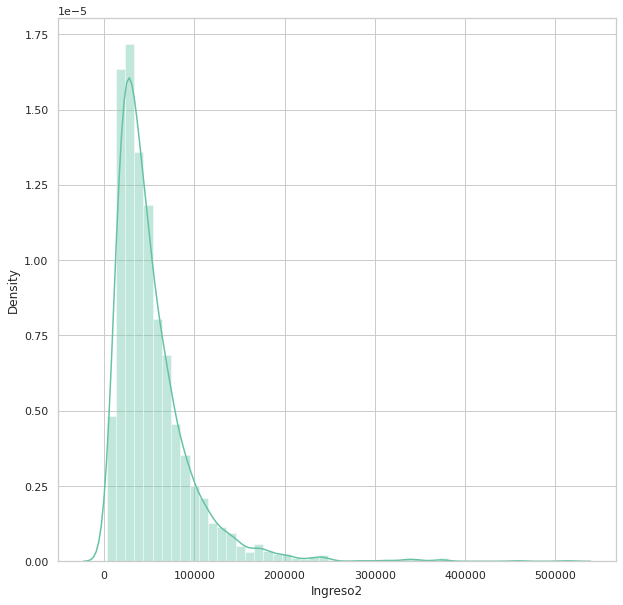

In [565]:
var_numeric = list(df.describe().columns)[1:]
for n in var_numeric:
  plt.figure(figsize=(10,10))
  sns.distplot(df[n])

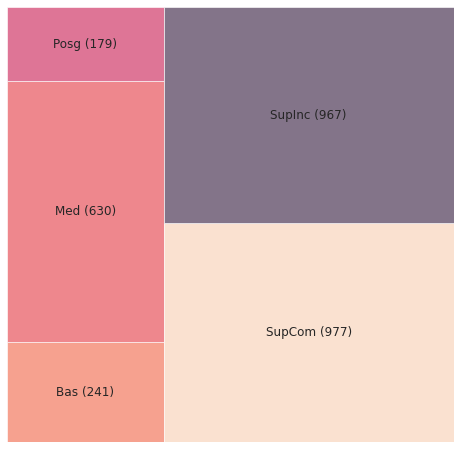

In [566]:
a = df.groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df.groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

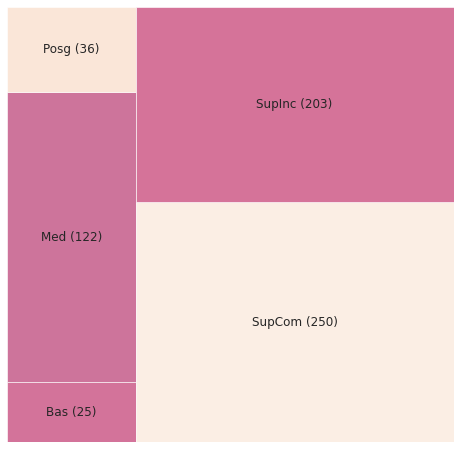

In [567]:
mask = df['VarObj'] == 'S'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

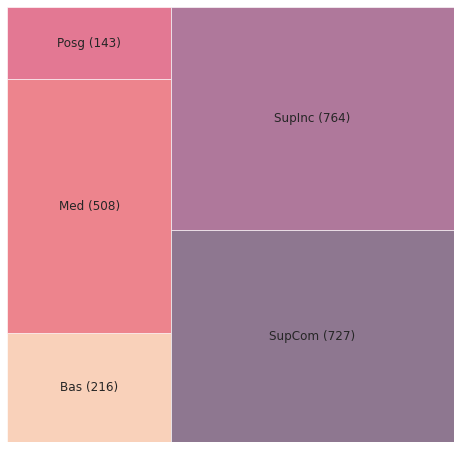

In [568]:
mask = df['VarObj'] == 'N'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

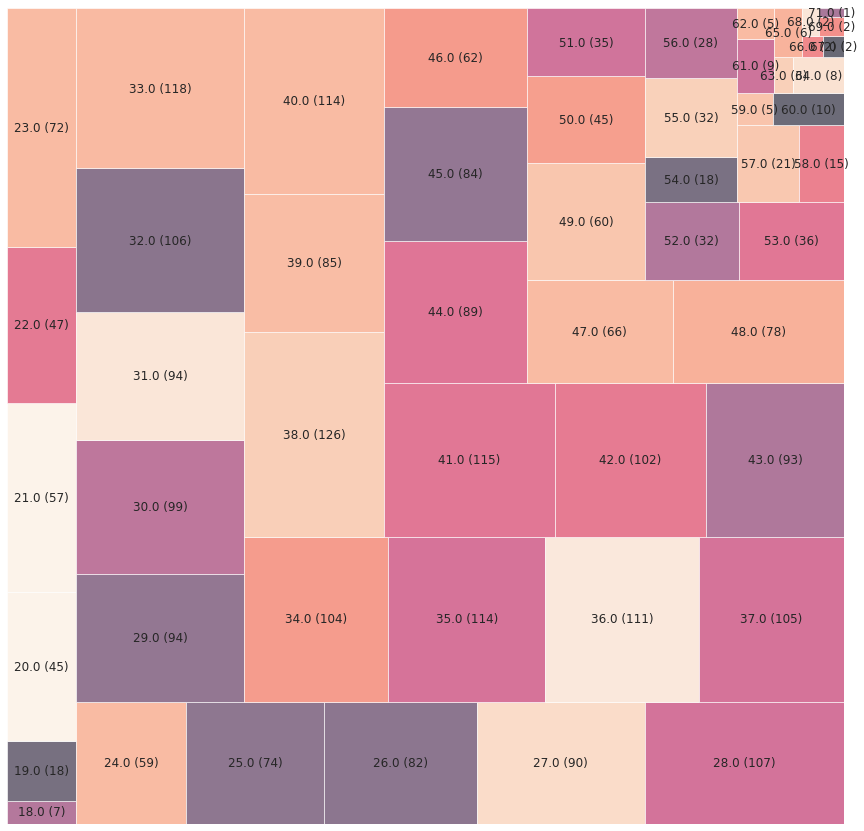

In [569]:
a = df.groupby('Edad').sum().index.get_level_values(0).tolist()
d = df.groupby('Edad').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(15,15))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

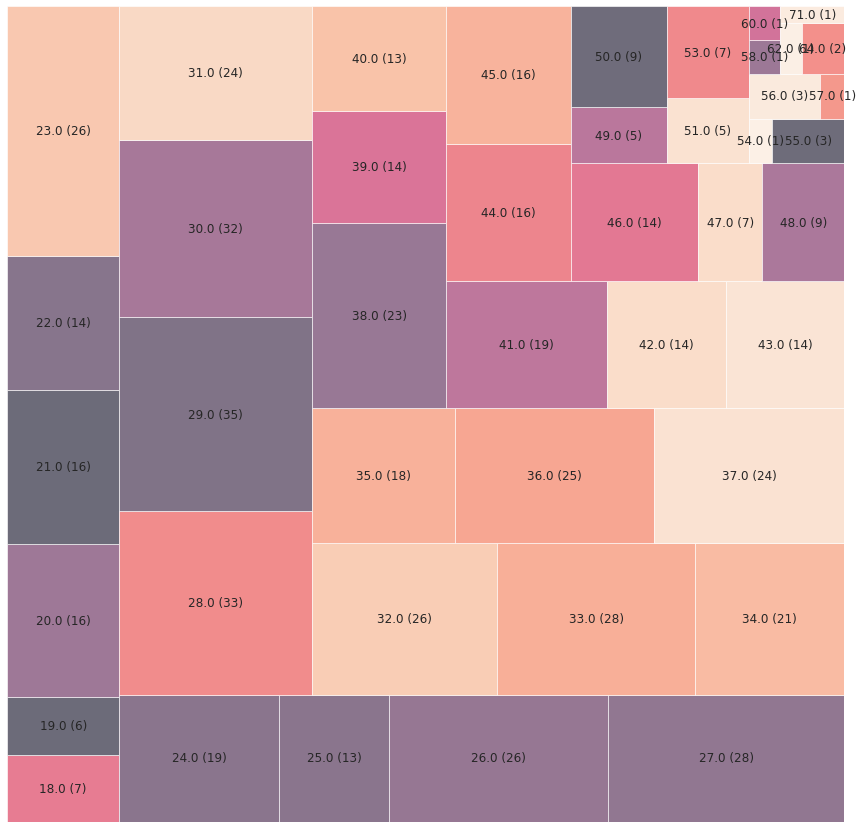

In [570]:
mask = df['VarObj'] == 'S'
a = df[mask].groupby('Edad').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('Edad').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(15,15))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

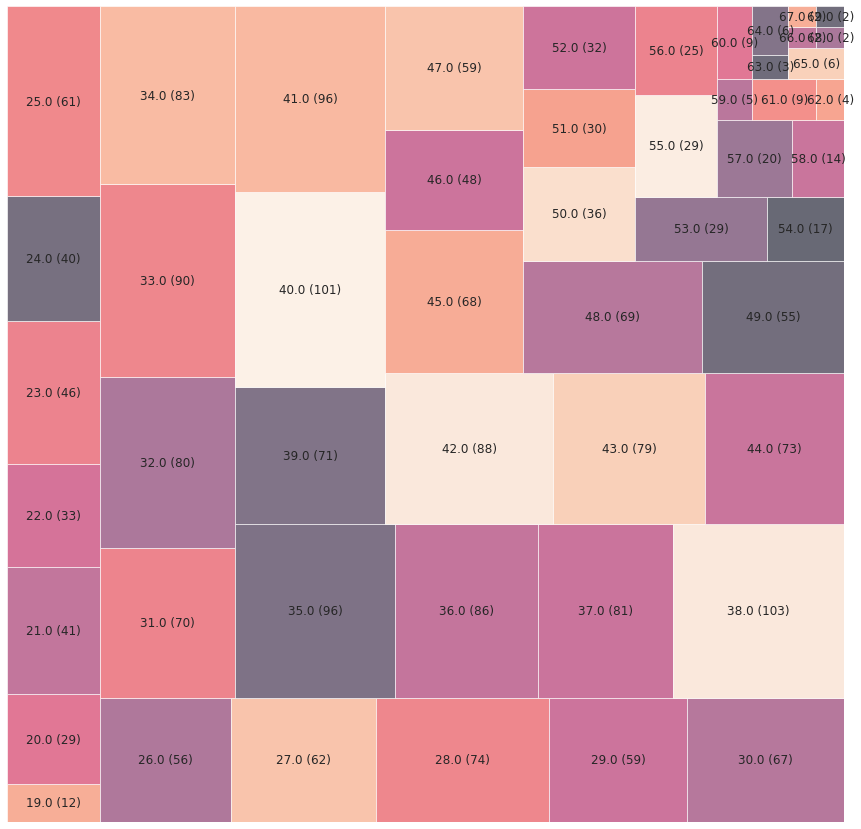

In [571]:
mask = df['VarObj'] == 'N'
a = df[mask].groupby('Edad').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('Edad').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(15,15))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

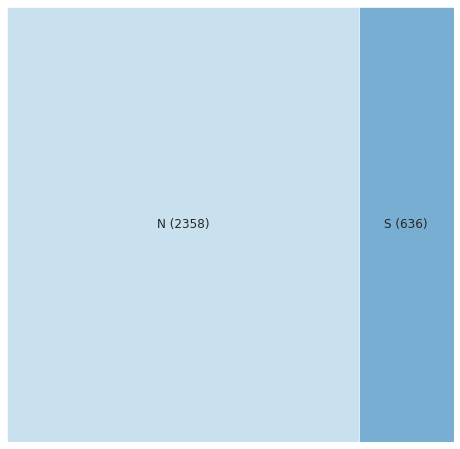

In [572]:
a = df.groupby('VarObj').count().index.get_level_values(0).tolist()
d = df.groupby('VarObj').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6,color=sns.color_palette("Paired"))
plt.axis('off')
plt.show()

In [573]:
ed = list(df['NivelEdu'].unique())
for i in ed:
  mask = (df['NivelEdu']== i) & (df['VarObj']=='S')
  mask2 = (df['NivelEdu']== i)
  n = df[mask2].shape[0]
  ap = df[mask]['VarObj'].count()/n
  print('Para el nivel educacional',i,round(ap*100,3),'% son aprobados')
  print()

Para el nivel educacional SupInc 20.993 % son aprobados

Para el nivel educacional Med 19.365 % son aprobados

Para el nivel educacional SupCom 25.589 % son aprobados

Para el nivel educacional Bas 10.373 % son aprobados

Para el nivel educacional Posg 20.112 % son aprobados



## Pre-procesamiento

In [574]:
null = ['AgnosDirec','AgnosEmpleo','DeudaExt','DeudaInt','Edad','Ingreso']
for n in null:
  mean = df[n].mean(skipna=True)
  df[n].fillna(value=mean,inplace=True)

In [575]:
df.isna().sum()

ID              0
AgnosDirec      0
AgnosEmpleo     0
DeudaExt        0
DeudaInt        0
Edad            0
Ingreso         0
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

In [576]:
df['DeudaIng'] = (df['DeudaExt']+df['DeudaInt'])/df['Ingreso']

In [577]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj,DeudaIng
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S,0.268601
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N,0.152004
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N,0.065726
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N,0.077474
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S,0.076554


## Transformaciones

In [578]:
ln_var = list(df.describe().columns)[1:]
for l in ln_var:
  var = 'ln_' + l
  df[var] = df[l].apply(lambda x: np.log(x+1) if x == 0 else np.log(x))

In [579]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj,DeudaIng,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S,0.268601,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,10.702640,-1.314528
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N,0.152004,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,11.349913,-1.883849
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N,0.065726,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,10.226977,-2.722257
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N,0.077474,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,11.736521,-2.557808
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S,0.076554,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,10.075562,-2.569761


In [580]:
df = pd.get_dummies(df,columns=['NivelEdu','VarObj'],drop_first=True)

In [581]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,DeudaIng,...,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc,VarObj_S
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,0.268601,...,8.943772,3.688879,11.068472,10.702640,-1.314528,0,0,0,1,1
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,0.152004,...,8.835215,3.891820,11.728537,11.349913,-1.883849,1,0,0,0,0
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,0.065726,...,6.980633,3.637586,10.373831,10.226977,-2.722257,0,0,1,0,0
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,0.077474,...,7.773776,3.761200,12.057210,11.736521,-2.557808,0,0,0,0,0
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,0.076554,...,7.041261,3.496508,10.163455,10.075562,-2.569761,0,0,0,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

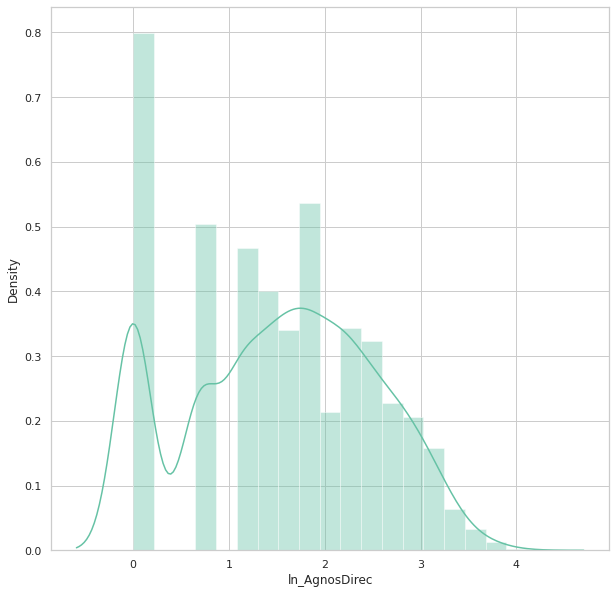

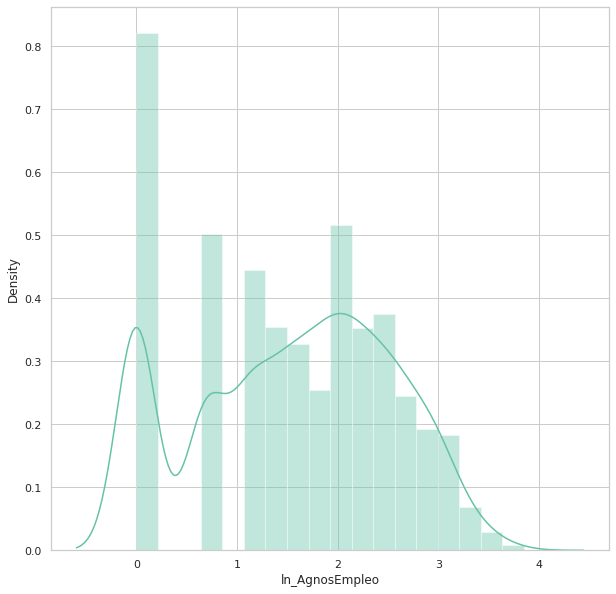

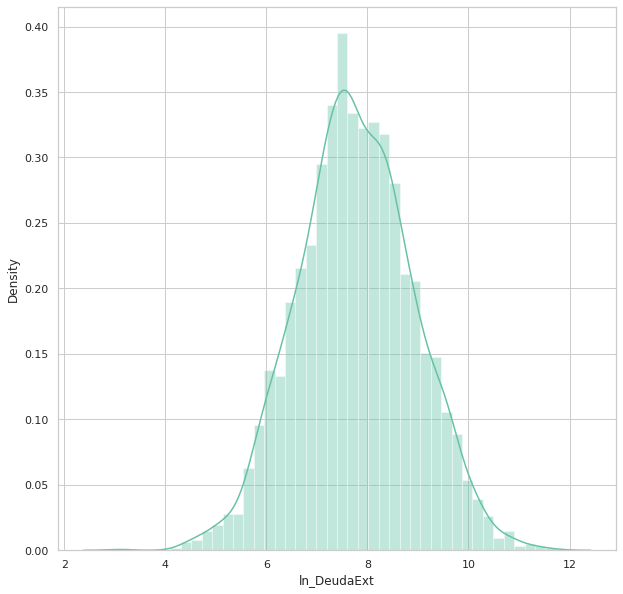

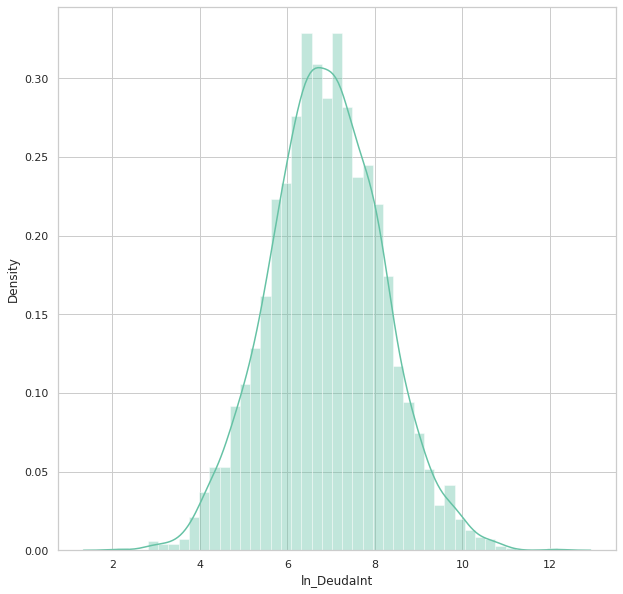

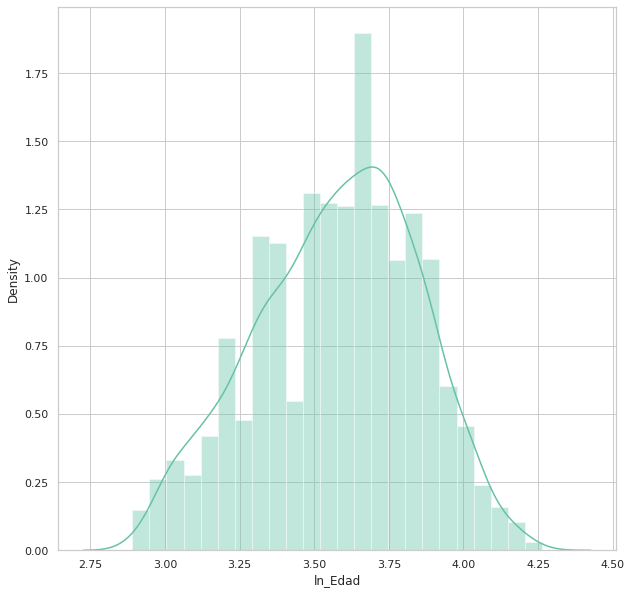

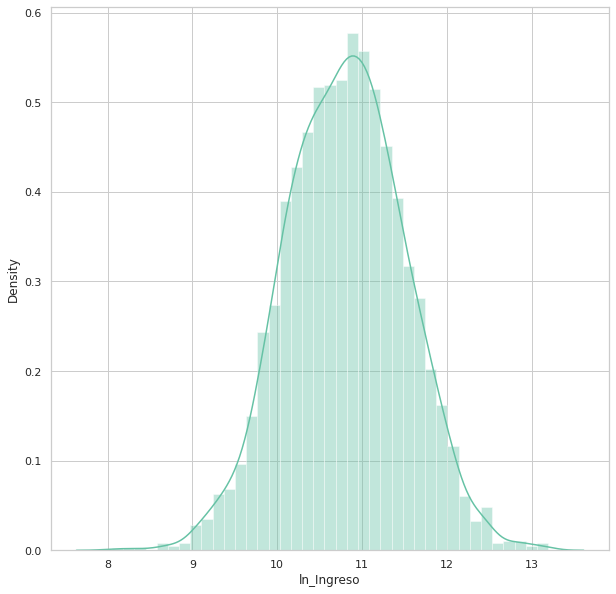

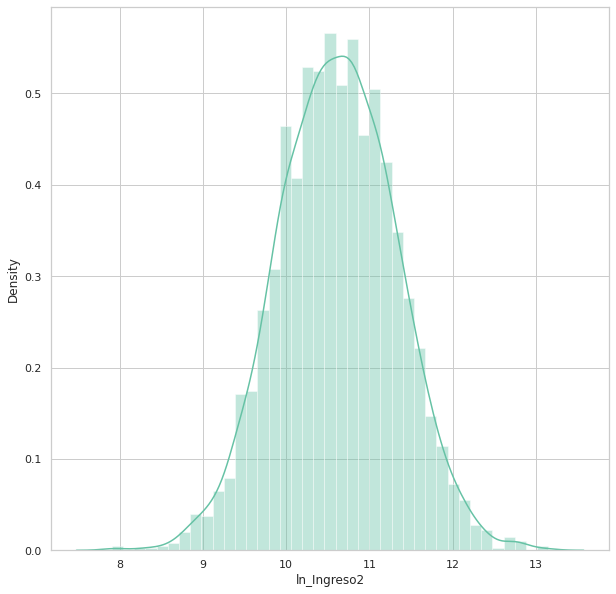

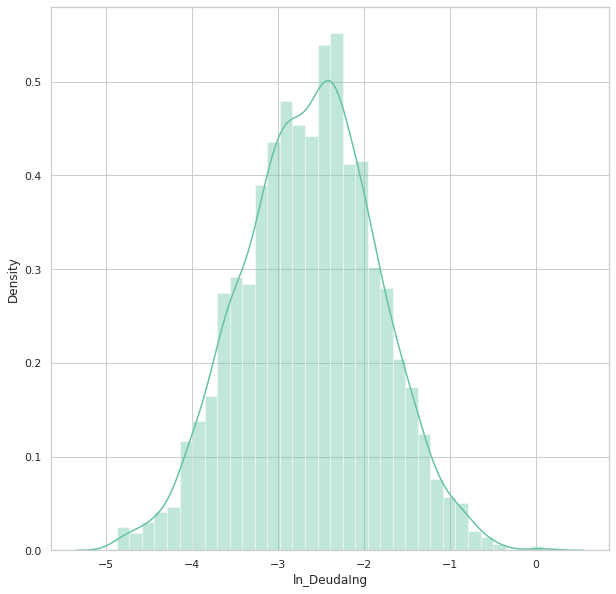

In [582]:
ln_var = ['ln_AgnosDirec', 'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt',
       'ln_Edad', 'ln_Ingreso', 'ln_Ingreso2', 'ln_DeudaIng']
for n in ln_var:
  plt.figure(figsize=(10,10))
  sns.distplot(df[n])

In [583]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ID,2994.0,101502.419,865.882,100001.000,100753.250,101503.500,102251.750,103000.000
AgnosDirec,2994.0,7.085,6.960,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,2994.0,7.145,6.654,0.000,2.000,5.000,10.000,47.000
DeudaExt,2994.0,4531.352,7088.624,21.551,1110.115,2278.618,5076.846,123939.236
DeudaInt,2994.0,2273.917,5409.888,8.304,415.046,960.163,2310.993,190648.853
Edad,2994.0,37.010,9.785,18.000,29.000,36.000,44.000,71.000
Ingreso,2994.0,62579.678,49379.675,3141.067,30282.678,49516.129,78851.470,536488.400
Ingreso2,2994.0,52195.117,42235.079,2715.602,25117.654,40777.492,66212.750,513618.589
DeudaIng,2994.0,0.097,0.085,0.008,0.042,0.074,0.123,1.088
ln_AgnosDirec,2994.0,1.525,0.979,0.000,0.693,1.609,2.303,4.111


In [584]:
df.columns

Index(['ID', 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'Nacionalidad', 'DeudaIng', 'ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S'],
      dtype='object')

In [585]:
# Nacionalidad no aporta información

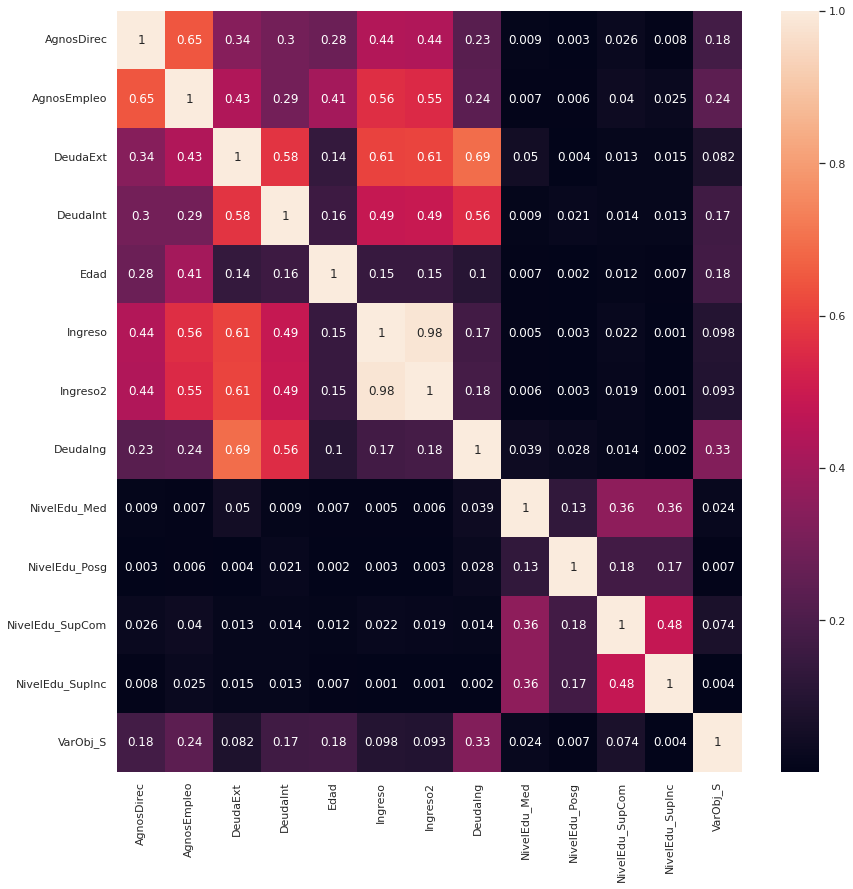

In [586]:
f = ['AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'Nacionalidad', 'DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S']
corr1 = df[f].corr(method='pearson').abs().round(3)

plt.figure(figsize=(14, 14))
sns.heatmap(corr1, annot=True)
plt.show()

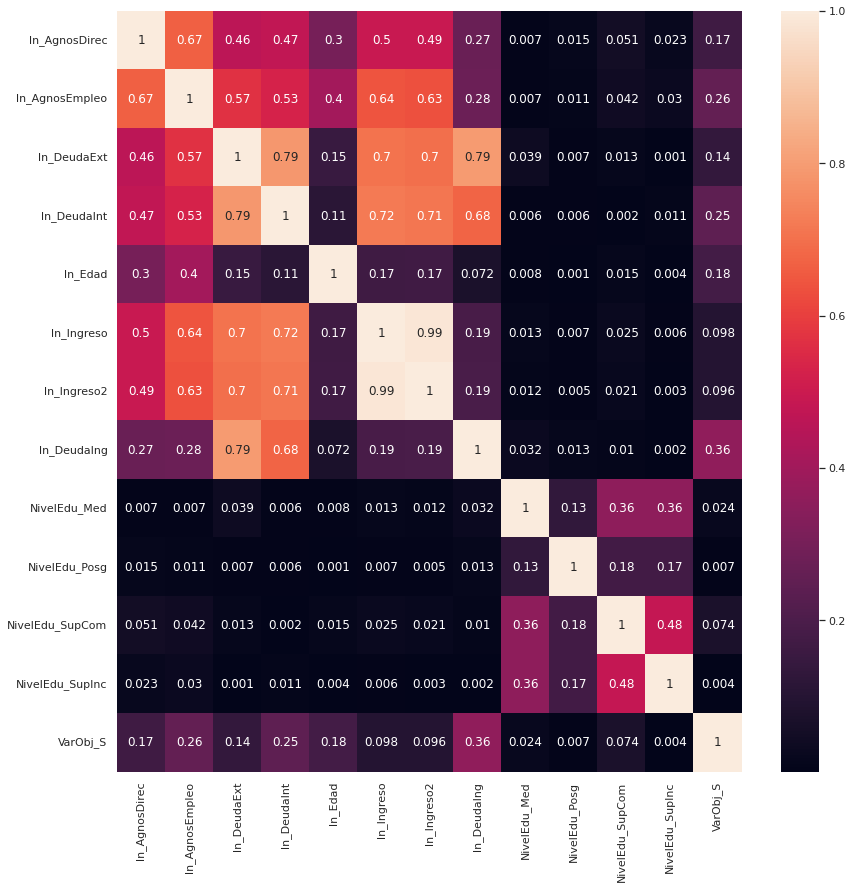

In [587]:
f = ['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S']
corr2 = df[f].corr(method='pearson').abs().round(3)

plt.figure(figsize=(14, 14))
sns.heatmap(corr2, annot=True)
plt.show()

In [588]:
# se descartan: 'ID', 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
#       'Ingreso', 'Ingreso2', 'Nacionalidad', 'DeudaIng', 
# ln_Ingreso2 se descarta por colinealidad cuasi-perfecta con ln_Ingreso

In [589]:
features = ['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc',]
X = df[features]
y = df['VarObj_S']

In [590]:
X.head()

,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_DeudaIng,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc
0,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,-1.314528,0,0,0,1
1,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,-1.883849,1,0,0,0
2,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,-2.722257,0,0,1,0
3,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,-2.557808,0,0,0,0
4,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,-2.569761,0,0,0,1


In [591]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: VarObj_S, dtype: uint8

# Entrenamiento de la Red Neuronal

In [592]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=12345)

In [593]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [594]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD

In [595]:
# CALLBACKS
callback_es = EarlyStopping(monitor='val_loss', patience=30)
callback_mc = ModelCheckpoint(path_base + '/models/' + 'best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()
#loss =  SparseCategoricalCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
#opt =  Adam(learning_rate=1e-4)
opt = SGD(learning_rate=0.01)

In [596]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Softmax

In [597]:
model = Sequential()
model.add(Dense(100, input_dim=11,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [598]:
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               1200      
                                                                 
 dense_40 (Dense)            (None, 50)                5050      
                                                                 
 dense_41 (Dense)            (None, 100)               5100      
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dense_43 (Dense)            (None, 1)                 51        
                                                                 
Total params: 16,451
Trainable params: 16,451
Non-trainable params: 0
_________________________________________________________________


In [599]:
max_epochs = 1000
history = model.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es,callback_mc],verbose=1)

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 0.6280 - accuracy: 0.7825 - val_loss: 0.5980 - val_accuracy: 0.8030
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5875 - accuracy: 0.7837 - val_loss: 0.5594 - val_accuracy: 0.8030
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5569 - accuracy: 0.7837 - val_loss: 0.5303 - val_accuracy: 0.8030
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5342 - accuracy: 0.7837 - val_loss: 0.5086 - val_accuracy: 0.8030
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5172 - accuracy: 0.7837 - val_loss: 0.4920 - val_accuracy: 0.8030
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.7837 - val_loss: 0.4788 - val_accuracy: 0.8030
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.7837 - val_loss: 0.4673 - val_accuracy: 0.8030
Epoch

# Evaluación

In [600]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

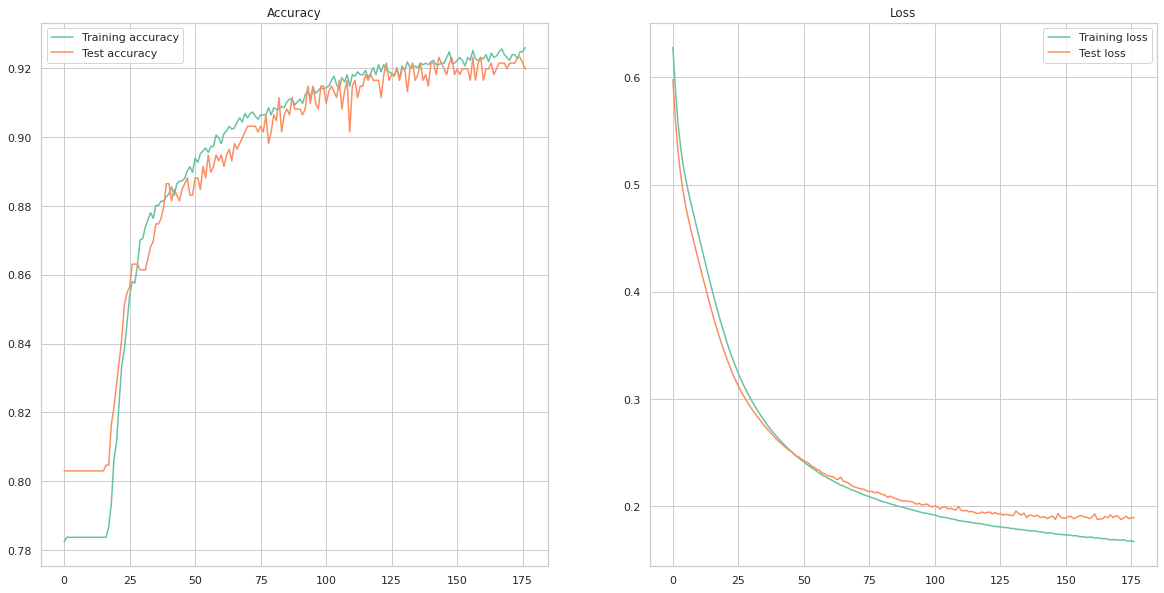

In [601]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training accuracy')
ax1.plot(range(n_epochs), test_acc, label='Test accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [602]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [603]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

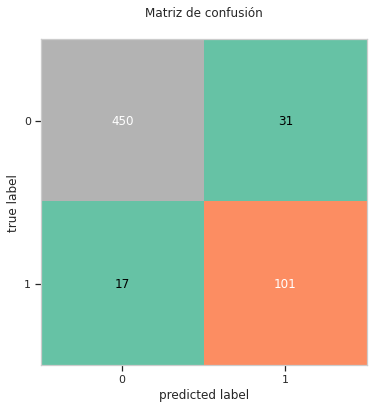

In [604]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = 'Set2')
plt.title('Matriz de confusión')
plt.show()

In [605]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9199


[0.18940529227256775, 0.9198664426803589]

In [606]:
from tensorflow import keras
best_model = keras.models.load_model(path_base + '/models/' + 'best_model.hdf5')

In [607]:
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

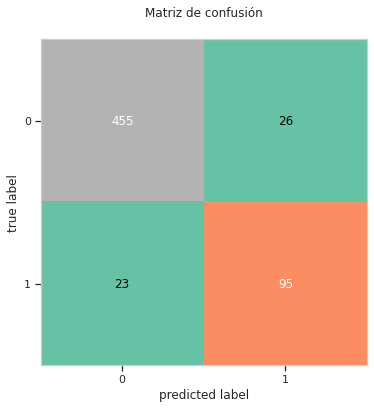

In [608]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = 'Set2')
plt.title('Matriz de confusión')
plt.show()

In [609]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9199


[0.18940529227256775, 0.9198664426803589]